In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/abhishek/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
date_columns = ['Internship_deadline', 'Earliest_Start_Date', 'Start Date', 
                'End Date', 'Start_Date']

train_merged = pd.read_csv('../data/train_merged.csv', parse_dates=date_columns)
test_merged = pd.read_csv('../data/test_merged.csv', parse_dates=date_columns)

## Training dataset

In [3]:
train_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted,Internship_Profile,Skills_required,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,8161,78663553,2015-01-03,2-5K,3,NaN,0,0,Voice Over Movie,NaN,...,80.4,internship,About C,JBEI,2013-08-01,2013-08-02,1,0,0,1
1,4977,7695797,2014-12-19,5-10K,2,IHFG,1,0,Social Media Marketing & Design,NaN,...,82.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
2,10271,78663092,2015-01-06,5-10K,6,NaN,0,0,Java Development,NaN,...,81.4,academic_project,NaN,JBEI,2014-11-01,2014-02-05,5,0,0,0
3,7393,7708503,2014-12-03,2-5K,1,IHFG,0,0,Fashion Curator,NaN,...,91.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
4,11125,78659782,2015-01-02,10K+,6,NaN,1,0,Business Development,"Communication,Business Development (Sales)",...,50.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0


## Test set

In [4]:
test_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Internship_Profile,Skills_required,Internship_Type,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,9341,7677714,2015-01-25,2-5K,2,IIBD,0,Content Writer,NaN,regular,...,88,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
1,6426,7696418,2015-01-21,5-10K,5,NaN,0,Android Development,NaN,regular,...,60,internship,NETWORK PLANNING,IIDB,2013-06-20,2013-08-19,2,0,0,1
2,5812,78666725,2015-01-09,10K+,5,NaN,1,Recruitment,NaN,regular,...,57,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
3,10711,7705454,2015-01-11,No Expectations,2,NaN,1,Content Development,NaN,virtual,...,74,training,NaN,JBFA,2013-06-05,2013-05-20,1,0,0,0
4,5880,7711946,2015-01-15,No Expectations,2,IHFG,1,Web Development,web development,regular,...,10,academic_project,Stock Analyst,JEJJ,2014-06-03,2015-12-01,6,0,2,1


## Class Distribution

In [5]:
train_merged.Is_Shortlisted.value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

## Exploratory Data Analysis

In [16]:
train_merged.loc[:, 'Earliest_Start_Date_year'] = train_merged.Earliest_Start_Date.dt.year
train_merged.loc[:, 'Earliest_Start_Date_month'] = train_merged.Earliest_Start_Date.dt.month
train_merged.loc[:, 'Earliest_Start_Date_day'] = train_merged.Earliest_Start_Date.dt.day

test_merged.loc[:, 'Earliest_Start_Date_year'] = test_merged.Earliest_Start_Date.dt.year
test_merged.loc[:, 'Earliest_Start_Date_month'] = test_merged.Earliest_Start_Date.dt.month
test_merged.loc[:, 'Earliest_Start_Date_day'] = test_merged.Earliest_Start_Date.dt.day

train_merged.loc[:, 'Internship_deadline_year'] = train_merged.Internship_deadline.dt.year
train_merged.loc[:, 'Internship_deadline_month'] = train_merged.Internship_deadline.dt.month
train_merged.loc[:, 'Internship_deadline_day'] = train_merged.Internship_deadline.dt.day

test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.year
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.month
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.day

### How do the acceptance rate change during different years ?

In [17]:
train_merged.groupby(['Earliest_Start_Date_year', 'Is_Shortlisted']).size()

Earliest_Start_Date_year  Is_Shortlisted
2014                      0                 106197
                          1                  17865
2015                      0                  61806
                          1                   6714
dtype: int64

In [22]:
train_merged.groupby(['Earliest_Start_Date_month', 'Is_Shortlisted']).size().unstack(1).fillna(0)

Is_Shortlisted,0,1
Earliest_Start_Date_month,,
1,52354,6098
2,2924,237
3,575,35
4,1963,127
5,2686,150
6,1101,61
7,126,2
8,25,0
9,6,0


## Students application count

In [16]:
application_count = train_merged.groupby('Student_ID').size()

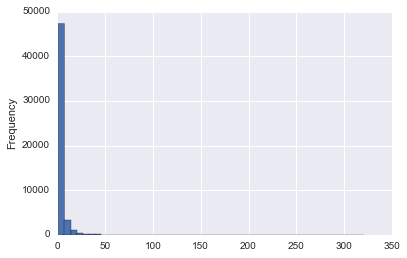

In [11]:
train_merged.groupby('Student_ID').size().order(ascending=False).plot(kind='hist', bins=50);

** As you can see very few people have applied for than 1 internship **

In [40]:
train_merged.groupby(['Student_ID', 'Is_Shortlisted']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False).head()

Is_Shortlisted,0,1
Student_ID,,
7706394,268,53
7690898,147,40
7654664,172,26
7701363,61,24
7708160,156,23


## Whether a student has applied previously

In [20]:
train_merged.loc[:, 'whether_applied_previously'] = train_merged.Student_ID.map(lambda x: int( application_count.ix[x] > 1 ))

In [22]:
train_merged.groupby(['whether_applied_previously', 'Is_Shortlisted']).size()

whether_applied_previously  Is_Shortlisted
0                           0                  20373
                            1                   2654
1                           0                 147630
                            1                  21925
dtype: int64

## If you haven't mentioned anything in your profile

In [26]:
train_merged.loc[:, 'missing_profile'] = train_merged.Profile.isnull().astype(np.int)

In [27]:
train_merged.groupby(['missing_profile', 'Is_Shortlisted']).size()

missing_profile  Is_Shortlisted
0                0                  54280
                 1                   9947
1                0                 113723
                 1                  14632
dtype: int64

## If internship hasn't mentioned any skills required

In [36]:
train_merged.loc[:, 'missing_skills_required'] = train_merged.Skills_required.isnull().astype(np.int)

In [37]:
train_merged.groupby(['missing_skills_required', 'Is_Shortlisted']).size()

missing_skills_required  Is_Shortlisted
0                        0                  22397
                         1                   4497
1                        0                 145606
                         1                  20082
dtype: int64

## What do people mention in their profiles ?

In [33]:
train_merged[['Internship_Profile', 'Profile', 'Skills_required' ,'Is_Shortlisted']].head(100)

,Internship_Profile,Profile,Skills_required,Is_Shortlisted
0,Voice Over Movie,About C,NaN,0
1,Social Media Marketing & Design,NaN,NaN,0
2,Java Development,NaN,NaN,0
3,Fashion Curator,NaN,NaN,0
4,Business Development,NaN,"Communication,Business Development (Sales)",0
5,Creative Writing And Graphic Design,Studied Construction On Site,"Graphic Designing,Graphic Designing,Graphic De...",1
6,Production Engineer,NaN,COMPUTER KNOWLEDGE IN WORD / EXCEL / POWER POI...,0
7,Survey Engineer,NaN,NaN,0
8,Business Analyst,"Research & Analysis (Meta-Analysis, Statistics...",NaN,1
9,PHP Development,NaN,NaN,0


## Relationship of Stipend and Performance in Undergraduate studies

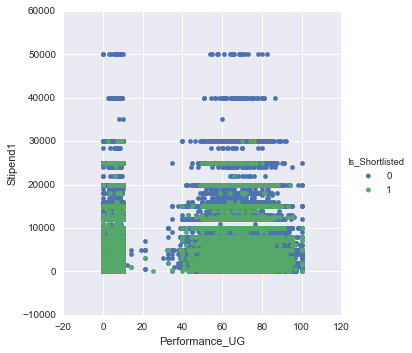

In [42]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.scatter, "Performance_UG", "Stipend1") \
   .add_legend();

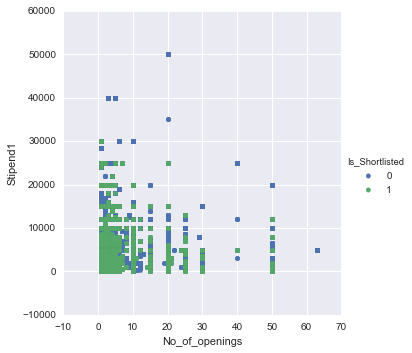

In [46]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.scatter, "No_of_openings", "Stipend1") \
   .add_legend();

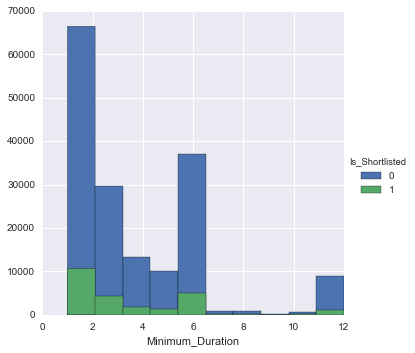

In [58]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.hist, "Minimum_Duration") \
   .add_legend();

## Preferred Location

In [47]:
train_merged.Preferred_location.value_counts()

IHFG    32294
IIDB     9621
IIBD     4642
JABD     3775
IHJB     2234
IJCE     2201
IJBG     2060
IJJI     1009
JBDB      948
IJAB      698
JECD      386
JBEI      314
IHHH      140
JEEH      127
IIAI      113
JCBC       81
JEAE       75
JBID       73
IIJJ       68
IJBH       57
IIGA       54
JCDD       51
JEJJ       50
JBBE       43
IHDJ       42
JAAJ       35
JBGH       33
JAGD       32
JDAE       32
JCGE       31
        ...  
JAFJ        2
JDGJ        2
JCAF        2
IIAB        1
IHHD        1
JBAB        1
JBAG        1
JECF        1
JACJ        1
IJFI        1
JDFF        1
JEEC        1
JCAA        1
IHHC        1
JBJA        1
JDCF        1
IJDH        1
IIIH        1
IJIG        1
JEGD        1
JCHF        1
IHHF        1
IICE        1
IJAD        1
JCIB        1
JCIF        1
IHFA        1
IJGE        1
IJGB        1
JCEC        1
Name: Preferred_location, dtype: int64

In [48]:
train_merged.Institute_location.value_counts()

IIDB    35077
JABD    18964
IIBD    15948
IHJB     9362
IJCE     9063
JEJJ     7518
JBDB     6478
JBEI     6130
IJJI     5537
IHJC     2751
IIJJ     2531
IJGB     2392
JAGD     2074
IIIF     1859
IJAE     1853
JDCF     1679
JCBC     1679
JEEH     1571
IJBG     1520
IJAB     1457
JBGH     1345
JEHI     1342
JECD     1337
IHHH     1298
JDGH     1211
JDAE     1177
IHHF     1033
IIGA      996
JCCD      995
JDCA      897
        ...  
IHDG        1
JCDC        1
JDAI        1
IHDC        1
JDAB        1
JEED        1
JAHI        1
JBCF        1
JDFJ        1
JCEH        1
JCJD        1
JEEF        1
IJIA        1
JDJF        1
IIGH        1
JEHG        1
JDDI        1
IHEF        1
JEHC        1
JAIB        1
JEDJ        1
IJFF        1
JCGG        1
JCGD        1
JBJG        1
IIJE        1
JAJB        1
IIIC        1
JEBH        1
IJJF        1
Name: Institute_location, dtype: int64

## What if your preferred location matches with internship location ?

In [51]:
train_merged.loc[:, 'location_matches'] = (train_merged.Internship_Location == train_merged.Preferred_location).astype(np.int)

In [52]:
train_merged.groupby(['location_matches', 'Is_Shortlisted']).size()

location_matches  Is_Shortlisted
0                 0                 157746
                  1                  22956
1                 0                  10257
                  1                   1623
dtype: int64

## Pivot Tables

In [61]:
train_merged.pivot_table(index='Is_Shortlisted', columns=['Minimum_Duration', 'Expected_Stipend'],
                         values='Performance_12th', aggfunc='mean', margins=True)

Minimum_Duration          1                                                2  \
Expected_Stipend       10K+       2-5K      5-10K No Expectations       10K+   
Is_Shortlisted                                                                 
0                 78.606045  80.750268  80.164372       78.892453  76.103827   
1                 80.887475  82.392616  82.013584       81.471198  79.419254   
All               78.887996  81.001756  80.416012       79.249588  76.465805   

Minimum_Duration                                                3             \
Expected_Stipend       2-5K      5-10K No Expectations       10K+       2-5K   
Is_Shortlisted                                                                 
0                 79.387255  77.450547       77.674254  72.815536  76.767582   
1                 80.612153  79.091611       79.971334  75.669970  80.144285   
All               79.575912  77.665161       77.985696  73.133013  77.278508   

Minimum_Duration    ...                  10         11                        \
Expected_Stipend    ...     No Expectations       10K+       2-5K      5-10K   
Is_Shortlisted      ...                                                        
0                   ...           72.783022  72.362973  71.907500  66.388919   
1                   ...           74.323750  74.400000  69.933333  88.087500   
All                 ...           73.013411  72.467436  71.512667  68.505854   

Minimum_Duration                         12                        \
Expected_Stipend No Expectations       10K+       2-5K      5-10K   
Is_Shortlisted                                                      
0                      68.888462  68.005935  70.448030  69.370279   
1                      72.166667  67.724789  72.904100  70.516275   
All                    69.325556  67.979919  70.825766  69.490094   

Minimum_Duration                        All  
Expected_Stipend No Expectations             
Is_Shortlisted                               
0                      68.754481  74.089945  
1                      70.215764  76.891402  
All                    68.921151  74.447491  

[3 rows x 49 columns]